In [1]:
fname='/Users/mgrecu/IEEE_Book/case/1C-R-CS-KWAJ.GPM.GMI.XCAL2016-C.20150311-S162548-E162730.005866.V07A.HDF5'
import netCDF4 as nc4
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs 
import cartopy.feature as cfeature



In [2]:
import glob

fs=glob.glob("/Users/mgrecu/GPM/ORO_old/KWAJ/Data/*HDF5")


In [7]:


def make_fig(lon,lat,Tc,sorb):
        fig=plt.figure(figsize=(12,12))
        labels=['10.65 GHz V-Pol','10.65 GHz H-Pol','18.7 GHz V-Pol', '18.7 GHz H-Pol','23.8 GHz V-Pol','36.64 GHz V-Pol',
                '36.64 GHz H-Pol','89.0 GHz V-Pol','89.0 GHz H-Pol']
        for i in range(3):
                for j in range(3):
                        ax=fig.add_subplot(3,3,i*3+j+1,projection=ccrs.PlateCarree())
                        plt.pcolormesh(lon,lat,Tc[:,:,i*3+j],cmap='jet')
                        ax.add_feature(cfeature.COASTLINE)
                        ax.set_extent([lon.min(),lon.max(),lat.min(),lat.max()])
                        ax.set_title('Channel %d\n%s'%(i*3+j+1,labels[i*3+j]))
                        plt.colorbar(shrink=0.75)
        plt.savefig('Figures/GMI_KWAJ_%s.png'%sorb)
        plt.close('all')

for f in sorted(fs)[1:4]:
        fname=f
        sorb=fname.split('/')[-1].split('.')[-3]
        #print(sorb)
        #continue
        ncFile=nc4.Dataset(fname)
        lat=ncFile['S1/Latitude'][:]
        lon=ncFile['S1/Longitude'][:]
        Tc=ncFile['S1/Tc'][:]
        #print(ncFile['S1/Tc'])
        make_fig(lon,lat,Tc,sorb)



/Users/mgrecu/miniconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/Users/mgrecu/miniconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)
/Users/mgrecu/miniconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrect

In [8]:
for f in sorted(fs)[1:2]:
        fname=f
        sorb=fname.split('/')[-1].split('.')[-3]
        #print(sorb)
        #continue
        ncFile=nc4.Dataset(fname)
        lat=ncFile['S1/Latitude'][:]
        lon=ncFile['S1/Longitude'][:]
        Tc=ncFile['S1/Tc'][:]
print(Tc.shape)

(32, 221, 9)


In [19]:
TcL=[Tc[:,:,i].flatten() for i in range(9)]
TcL=np.array(TcL)
print(TcL.shape)    
TcL=TcL.T


(9, 7072)


In [20]:
# normalize TcL using stadard scaler and do PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(TcL)
TcL_scaled=scaler.transform(TcL)
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca.fit(TcL_scaled)

PCA(n_components=5)

In [22]:
print(pca.explained_variance_ratio_[:].cumsum()/pca.explained_variance_ratio_.sum()*100)
print(scaler.mean_)


[ 81.3411   96.54504  99.13086  99.70857 100.     ]
[180.4319246  107.78603083 218.5205557  168.91791576 255.07017243
 239.57802874 200.47418125 272.5278125  263.30026167]


(7072, 5)


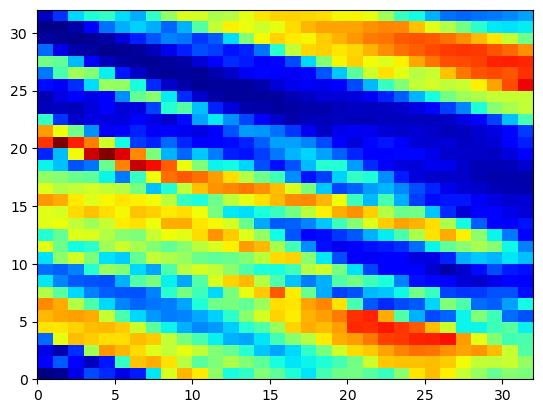

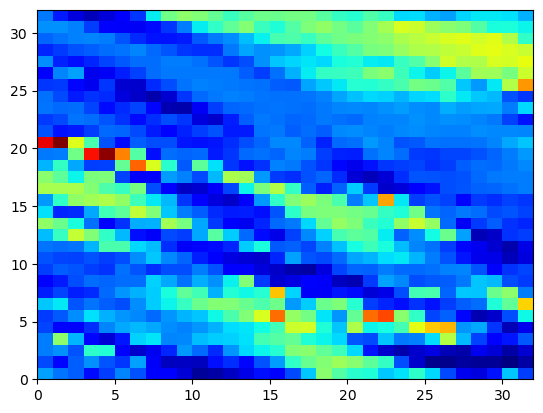

In [27]:

pca_Comp=pca.transform(TcL_scaled)
print(pca_Comp.shape)

pca2d_0=pca_Comp[:,0].reshape(Tc.shape[0],Tc.shape[1])
plt.pcolormesh(pca2d_0[:,:32],cmap='jet')
plt.figure()
pca2d_1=pca_Comp[:,1].reshape(Tc.shape[0],Tc.shape[1])
plt.pcolormesh(pca2d_1[:,:32],cmap='jet')